In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path='/kaggle/input/heart-disease-uci/heart.csv'
df=pd.read_csv(path)

In [4]:
#Columns NAme and Discription
'''
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
'''

'\nage\nsex\nchest pain type (4 values)\nresting blood pressure\nserum cholestoral in mg/dl\nfasting blood sugar > 120 mg/dl\nresting electrocardiographic results (values 0,1,2)\nmaximum heart rate achieved\nexercise induced angina\noldpeak = ST depression induced by exercise relative to rest\nthe slope of the peak exercise ST segment\nnumber of major vessels (0-3) colored by flourosopy\nthal: 3 = normal; 6 = fixed defect; 7 = reversable defect\n'

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df['sex'].value_counts()
print('Male : ',1)
print('Female : ',0)

Male :  1
Female :  0


thalach       AxesSubplot(0.125,0.125;0.352273x0.755)
oldpeak    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

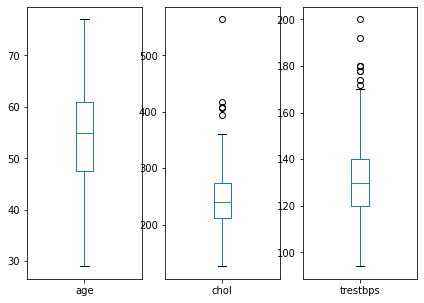

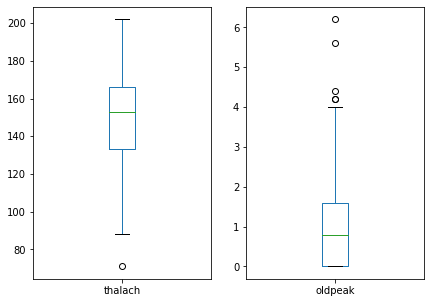

In [7]:
df[['age','chol','trestbps']].plot(kind='box',figsize=(7,5),subplots=True)
df[['thalach','oldpeak']].plot(kind='box',figsize=(7,5),subplots=True)
#As you can see that there is an Outliar in 'resting blood pressure','cholestrol' 'old peak'

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [11]:
#above box plots shows that we have outliars There is another statistical method for 
#finding outliars in our data sets are Kurtosis and Skewness

'''
Kurtosis is a measure of whether the data are heavy-tailed or 
light-tailed relative to a normal distribution.
That is, data sets with high kurtosis tend to have heavy tails, or outliers
'''

'''
The skewness for a normal distribution is zero,
and any symmetric data should have a skewness near zero.
Negative values for the skewness indicate data that are
skewed left and positive values for the skewness indicate data that
are skewed right. By skewed left, we mean that the left tail is long
relative to the right tail. Similarly, skewed right means that the right
tail is long relative to the left tail.
'''

'\nThe skewness for a normal distribution is zero,\nand any symmetric data should have a skewness near zero.\nNegative values for the skewness indicate data that are\nskewed left and positive values for the skewness indicate data that\nare skewed right. By skewed left, we mean that the left tail is long\nrelative to the right tail. Similarly, skewed right means that the right\ntail is long relative to the left tail.\n'

In [12]:
df.kurtosis()
#As you can see that there is an Outliar in 'resting blood pressure','cholestrol' 'old peak' 
#in above box plot we have three columns which kurtosis value is high from the rest of columns

age        -0.542167
sex        -1.382961
cp         -1.193071
trestbps    0.929054
chol        4.505423
fbs         1.959678
restecg    -1.362673
thalach    -0.061970
exang      -1.458317
oldpeak     1.575813
slope      -0.627521
ca          0.839253
thal        0.297915
target     -1.980783
dtype: float64

In [13]:
#on the given summary defination of skew when we have 0 and less than zero our distribution is normal
#on the columns while greater than zero it must lead toward outliars
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

In [14]:
def outliars(df):
    Num_var=[var for var in df.columns if df[var].dtypes!='O']
    outliar=pd.DataFrame(columns=['Feature','outliars'])
    
    for i in df[Num_var]:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        fence_low=q1-(IQR*1.5)
        fence_high=q3-(IQR*1.5)
        Out_data=outliar.append({'Feature':i,
                                  'outliars':df.loc[(df[i] < fence_low)|(df[i] > fence_high)].shape[0]},ignore_index=True)
        return Out_data


outliars(df)        

,Feature,outliars
0,age,284


In [15]:
Num_var=[var for var in df.columns if df[var].dtypes!='O']

In [16]:
#Another way

from scipy import stats
Z_score=stats.zscore(df[['trestbps','chol','ca','thal']])
z=Z_score>3
print(z)








[[False False False False]
 [False False False False]
 [False False False False]
 ...
 [False False False False]
 [False False False False]
 [False False False False]]


In [17]:
import numpy as np
np.where(z)

(array([ 28,  85,  92, 158, 163, 164, 220, 223, 246, 248, 251]),
 array([1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2]))

In [18]:
z[:252]

array([[False, False, False, False],
       [False, False, False, False],
       [False, False, False, False],
       ...,
       [False, False, False, False],
       [False, False, False, False],
       [False, False,  True, False]])

In [19]:
#Yeah I got it You can see these indexes we have outliars but we dont want to drop 
# it because we have not enough data so we will continue but our aim is to find outliar

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x=df.drop(columns=['target']).values
x.shape



(303, 13)

In [22]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [25]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [26]:
import tensorflow as tf
import keras 
from keras.layers import Dense

In [27]:
# adding first layer
model=tf.keras.models.Sequential()
model.add(Dense(units=13, kernel_initializer='uniform', activation='relu',input_shape=(13,)))


#adding the second hidden layer
model.add(Dense(units=2, kernel_initializer='uniform', activation='relu'))


#adding the output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.fit(X_train,Y_train,batch_size=500,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 585ms/step - loss: 0.6932 - accuracy: 0.3302
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5566
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6930 - accuracy: 0.5566
Epoch 4/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5566
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5566
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5566
Epoch 7/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5566
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5566
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5566
Epoch 10/200
1/1 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5566
Epoch 11/200
1/1 [=========

In [30]:

predict=model.predict(X_test)
np.where(predict>0.75)


(array([11, 13, 14, 20, 24, 28, 29, 32, 34, 37, 49, 50, 52, 53, 54, 56, 57,
        59, 61, 66, 68, 71, 75]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0]))

In [31]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
" Please Insert value for prediction: age,sex,cp,tresbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cs,thal"
prediction=[[50,1,132,105,0,1,200,0,7.3,3,1,2,45]]
prediction=np.array(prediction)
prediction.shape



(1, 13)

In [33]:
result=model.predict(prediction)
print(np.round(result[0]))

[1.]
